## Linear regression
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices

The fille ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos del archivo de texto, separados por comas
data = np.loadtxt('ex1data2.txt', delimiter=',')
print(data[0:5,:])  # Muestra las primeras 5 filas para inspección

# Crear vectores X y y
X = data[:, 0:2]  # Las dos primeras columnas (tamaño y número de habitaciones)
y = data[:, 2:]   # La tercera columna (precio)


[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


In [84]:
print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.0f} {X[i, 1]:.0f}], y = {y[i,0].item():.0f}')  # Muestra los 10 primeros ejemplos


First 10 examples from the dataset:
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500


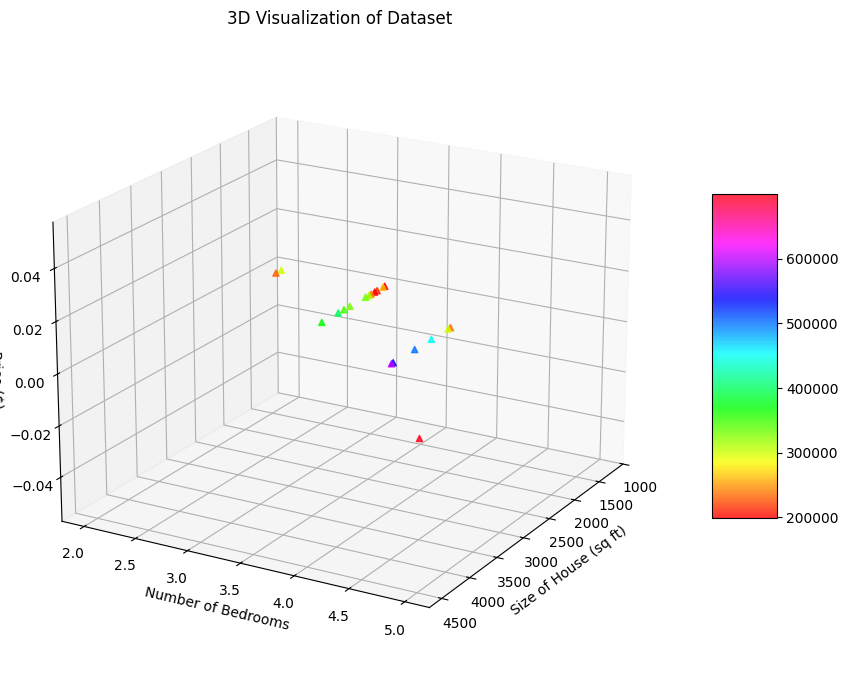

In [85]:
# ==================== Parte 1: Visualización ====================
from mpl_toolkits.mplot3d import Axes3D

# Crear figura y eje 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos en 3D con color según precio
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X[0:20, 0], X[0:20, 1],
                    alpha = 0.8,
                    c = y[0:20,0],
                    cmap = my_cmap,
                    marker ='^')

# Etiquetas de los ejes
ax.set_xlabel('Size of House (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price ($)')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

# Configurar vista y cuadrícula
ax.view_init(elev=20, azim=30)
ax.grid(True)

plt.title('3D Visualization of Dataset')
plt.tight_layout()
plt.show()

## Feature normalization

Your task here is to complete the code in featureNormalize.m to

Subtract the mean value of each feature from the dataset.
After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations
The mean and std should be:

mu= [2000.68085106 3.17021277], std = [7.94702354e+02 7.60981887e-01]

In [86]:

# ==================== Normalización ====================
# Definir función de normalización de características
def featureNormalize(X):
    mu = np.mean(X, axis=0)       # Calcular media de cada columna
    sigma = np.std(X, axis=0)     # Calcular desviación estándar de cada columna
    X_norm = (X - mu) / sigma     # Normalizar
    return X_norm, mu, sigma

# Normalizar datos
X, mu, sigma = featureNormalize(X)

# Mostrar media, desviación y los primeros 10 valores normalizados
print(f'mu= {mu}, std = {sigma}')
print('First 10 examples from the dataset:')
for i in range(10):
     print(f'x = [{X[i, 0]:.4f} {X[i, 1]:.4f}]')
print(X.shape)


mu= [2000.68085106    3.17021277], std = [7.86202619e+02 7.52842809e-01]
First 10 examples from the dataset:
x = [0.1314 -0.2261]
x = [-0.5096 -0.2261]
x = [0.5079 -0.2261]
x = [-0.7437 -1.5544]
x = [1.2711 1.1022]
x = [-0.0199 1.1022]
x = [-0.5936 -0.2261]
x = [-0.7297 -0.2261]
x = [-0.7895 -0.2261]
x = [-0.6445 -0.2261]
(47, 2)


# Cost Function

The objective of linear regression is to minimize the cost function: 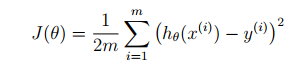

where the hypothesis h is given by

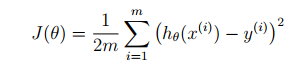


In [87]:

# ==================== Cálculo de parámetros con optimización ====================
from scipy.optimize import minimize

# Función de costo para regresión lineal
def cost_function(theta, X, y):
    m = len(y)
    predictions = X @ theta           # hθ(x)
    errors = predictions - y
    J = (1 / (2 * m)) * np.dot(errors.T, errors)  # Función de costo
    return float(J)

# Añadir columna de unos para el término bias (intercepto)
m = data.shape[0]
X = data[:, 0:2]
[X, mu, sigma] = featureNormalize(X)
X = np.hstack([np.ones((m, 1)), X])  # Concatenar vector de unos
y = y.reshape(m,)  # Convertir y en vector plano

print(X[0:5,:])  # Mostrar primeras 5 filas de X

theta = np.zeros(3)  # Inicializar θ en cero
# Minimizar la función de costo
result = minimize(fun=cost_function, x0=theta, args=(X, y), method='TNC')
theta = result.x  # Obtener θ óptimo

# Imprimir resultados
print(f"Model parameter: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}")

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]
Model parameter: [345623.93527227  14736.46432765  16105.28817951]
Cost function: 5596218346.884829


##  Gradient descent
Next, you will implement gradient descent in the file gradientDescent.m. The loop structure has been written for you, and you only need to supply the updates to θ within each iteration.

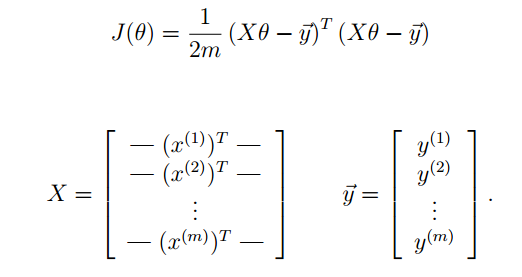

Using the following values: iterations = 3 theta = np.zeros((2, 1)) alpha = 0.01

The first three iteration:

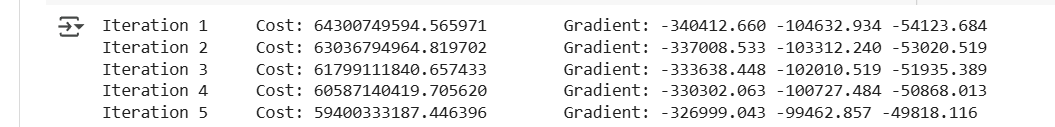

In [88]:


# ==================== Gradiente descendente ====================
iterations = 3
theta = np.zeros((3, 1))  # Inicializar θ como vector columna
alpha = 0.01
y = y.reshape(-1, 1)  # Asegurar que y sea vector columna

# Función de gradiente descendente
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros(iterations)

    for iter in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        grad_J = (1 / m) * (X.T @ errors)
        theta = theta - alpha * grad_J  # Actualizar θ
        J_history[iter] = cost_function(theta, X, y)

        # Mostrar información de cada iteración
        print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}\tGradient: {grad_J[0, 0]:.3f} {grad_J[1, 0]:.3f} {grad_J[2, 0]:.3f}")

    return theta, J_history

# Ejecutar gradiente descendente
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print("Theta found by gradient descent: ", theta.ravel())

Iteration 1	Cost: 64297776251.620087	Gradient: -340412.660 -105764.133 -54708.822
Iteration 2	Cost: 63031018305.521324	Gradient: -337008.533 -104400.141 -53569.489
Iteration 3	Cost: 61790694237.532486	Gradient: -333638.448 -103056.168 -52449.188
Theta found by gradient descent:  [10110.59640202  3132.20441912  1607.2749847 ]


C:\Users\Juan Marques\AppData\Local\Temp\ipykernel_20956\2209988307.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(J)


In [89]:
# ==================== Predicción ====================
input_features = np.array([2000, 3])  # Tamaño de casa y habitaciones
normalized_features = (input_features - mu) / sigma  # Normalizar entrada
print(normalized_features)
# Add the bias term (1) as the first element
predict1 = np.hstack([1, normalized_features]) @ theta  # Predecir con θ óptimo
print(f'For a house with {input_features[0]} sqft and {input_features[1]} bedrooms, we predict a profit of ${(predict1 * 10000).item():.2f}')

[-0.000866   -0.22609337]
For a house with 2000 sqft and 3 bedrooms, we predict a profit of $97444897.01


# Selecting learning rates
In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate and call the function "gradientDescent".

You need to modify "gradientDescent" function and it should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against the number of the iterations.

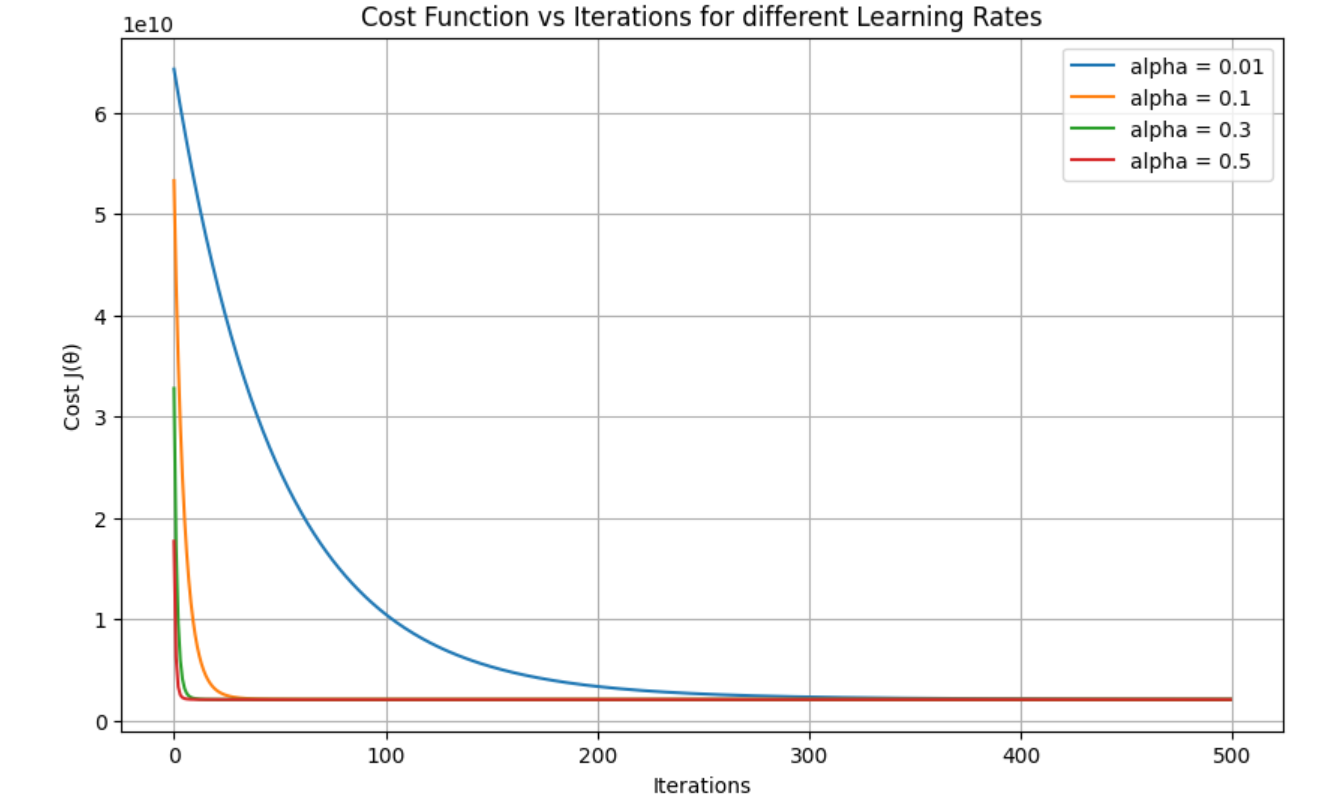

## Gráfica prueba 1

Iteration 1	Cost: 64297776251.620087	Gradient: -340412.660 -105764.133 -54708.822
Iteration 2	Cost: 63031018305.521324	Gradient: -337008.533 -104400.141 -53569.489
Iteration 3	Cost: 61790694237.532486	Gradient: -333638.448 -103056.168 -52449.188
Iteration 4	Cost: 60576236901.991043	Gradient: -330302.063 -101731.908 -51347.615
Iteration 5	Cost: 59387091739.988594	Gradient: -326999.043 -100427.059 -50264.474
Iteration 6	Cost: 58222716488.389389	Gradient: -323729.052 -99141.324 -49199.470
Iteration 7	Cost: 57082580895.895401	Gradient: -320491.762 -97874.410 -48152.317
Iteration 8	Cost: 55966166445.978867	Gradient: -317286.844 -96626.028 -47122.729
Iteration 9	Cost: 54872966086.507782	Gradient: -314113.976 -95395.896 -46110.427
Iteration 10	Cost: 53802483965.895058	Gradient: -310972.836 -94183.734 -45115.137
Iteration 11	Cost: 52754235175.605446	Gradient: -307863.107 -92989.267 -44136.588
Iteration 12	Cost: 51727745498.859932	Gradient: -304784.476 -91812.224 -43174.513
Iteration 13	Cost: 5

C:\Users\Juan Marques\AppData\Local\Temp\ipykernel_20956\2209988307.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(J)


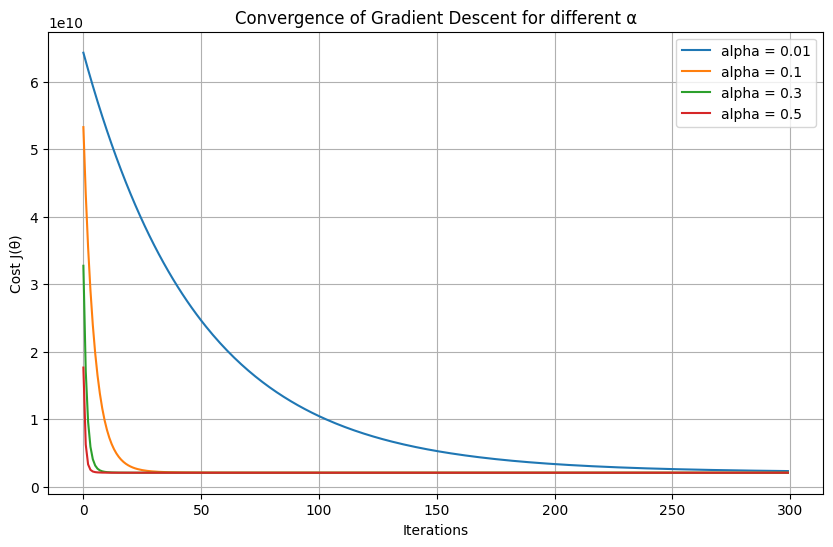

In [90]:

# ==================== Comparación de alfas ====================
iterations = 300
theta = np.zeros((3, 1))
alpha_vector = np.array([0.01, 0.1, 0.3, 0.5])  # Diferentes tasas de aprendizaje
matrix_J = np.zeros((iterations, len(alpha_vector)))

# Ejecutar gradiente descendente para cada alpha
for i, alpha in enumerate(alpha_vector):
    theta = np.zeros((3, 1))
    theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
    matrix_J[:, i] = J_history  # Guardar historial de costo

# Graficar la convergencia del costo para cada alpha
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alpha_vector):
    plt.plot(range(iterations), matrix_J[:, i], label=f'alpha = {alpha}')
plt.xlabel('Iterations')
plt.ylabel('Cost J(θ)')
plt.title('Convergence of Gradient Descent for different α')
plt.legend()
plt.grid(True)
plt.show()

## Gráfica prueba 2

Iteration 1	Cost: 7828546391.702181	Gradient: -340412.660 -105764.133 -54708.822
Iteration 2	Cost: 4595162832.427100	Gradient: 68082.532 57915.002 82011.100
Iteration 3	Cost: 3877239479.271784	Gradient: -13616.506 -66691.232 -55318.822
Iteration 4	Cost: 3426198089.916251	Gradient: 2723.301 50510.318 55877.648
Iteration 5	Cost: 3092667220.980160	Gradient: -544.660 -47649.644 -45116.475
Iteration 6	Cost: 2840704423.755804	Gradient: 108.932 39846.424 41041.980
Iteration 7	Cost: 2649476645.502240	Gradient: -21.786 -35547.880 -34983.625
Iteration 8	Cost: 2504158970.499558	Gradient: 4.357 30617.195 30883.502
Iteration 9	Cost: 2393688550.733582	Gradient: -0.871 -26875.937 -26750.251
Iteration 10	Cost: 2309699943.224813	Gradient: 0.174 23350.303 23409.622
Iteration 11	Cost: 2245842949.601397	Gradient: -0.035 -20400.405 -20372.409
Iteration 12	Cost: 2197291682.131348	Gradient: 0.007 17769.538 17782.751
Iteration 13	Cost: 2160377448.840794	Gradient: -0.001 -15503.217 -15496.981
Iteration 14	Cost

C:\Users\Juan Marques\AppData\Local\Temp\ipykernel_20956\2209988307.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(J)


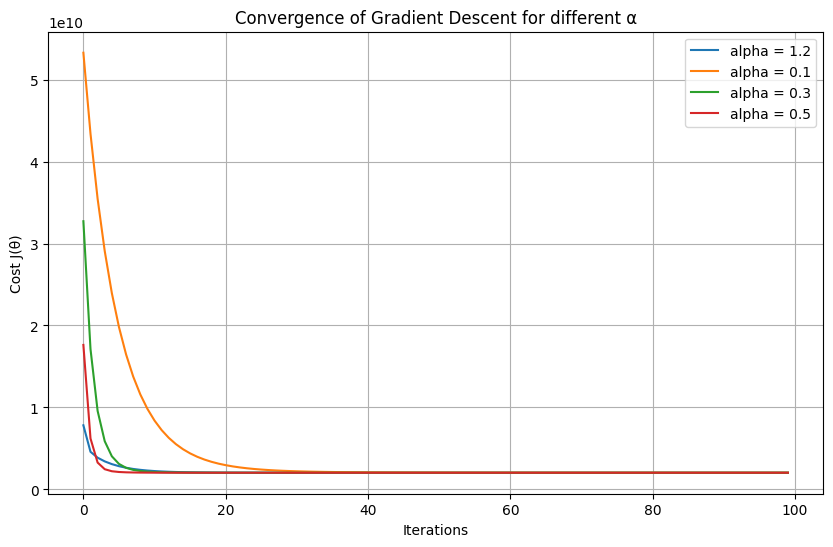

In [91]:


# ==================== Otra comparación de alfas ====================
iterations = 100
theta = np.zeros((3, 1))
alpha_vector = np.array([1.2, 0.1, 0.3, 0.5])  # Otra selección de alfas
matrix_J = np.zeros((iterations, len(alpha_vector)))

for i, alpha in enumerate(alpha_vector):
    theta = np.zeros((3, 1))
    theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
    matrix_J[:, i] = J_history

# Graficar resultados
plt.figure(figsize=(10, 6))
for i, alpha in enumerate(alpha_vector):
    plt.plot(range(iterations), matrix_J[:, i], label=f'alpha = {alpha}')
plt.xlabel('Iterations')
plt.ylabel('Cost J(θ)')
plt.title('Convergence of Gradient Descent for different α')
plt.legend()
plt.grid(True)
plt.show()
